In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from joblib import dump, load
%matplotlib inline

plt.style.use('seaborn')

In [3]:
month = 'nov'
print(month)

# read saved dataset.
df_normalized = pd.read_csv(f'data/normalized_{month}.csv')
df_normalized = df_normalized.drop(columns=['Unnamed: 0'])
df_normalized.head()

# get groups and keys on dataset.

new_groups = df_normalized.groupby('meterid')
new_keys = new_groups.groups.keys()  # keys: an iterable of dataids or meter ids

new_id_list = list(new_keys)
display('number of valid meterids:', len(new_id_list))

nov


'number of valid meterids:'

118

### Get clustering info

In [4]:
from sklearn.cluster import KMeans

In [5]:
def get_monthly_result(month='nov', n_clusters=3):
    print(month)
    # read saved dataset.
    df_normalized = pd.read_csv(f'data/normalized_{month}.csv')
    df_normalized = df_normalized.drop(columns=['Unnamed: 0'])
    df_normalized.head()

    # get groups and keys on dataset.

    new_groups = df_normalized.groupby('meterid')
    new_keys = new_groups.groups.keys()  # keys: an iterable of dataids or meter ids

    new_id_list = list(new_keys)
    display('number of valid meterids:', len(new_id_list))

    #  Construct dataframe over which to run correlation analysis.

    df_total = pd.DataFrame()
    display(df_total)
    for key in new_id_list:
        df_i = new_groups.get_group(key).rename(columns={'norm_cumul_value': f'{key}'}).reset_index()    
        df_total = pd.concat([df_total, df_i[f'{key}']], axis=1)

    display(len(df_total))
    #display(df_total)  # column names are meterids

    # get corr matrix

    df_total = df_total.fillna(0)
    df_corr = df_total.corr()  # get correlations between meterids for the month's cumulative vals.
    df_corr = df_corr.fillna(0)
    #display(df_corr)

    # find top n positive correlations per meterid
#     n = 10
#     for meterid in new_id_list[1:2]:    
#         # slice is to show an example.
#         df_corr_sorted = df_corr[f'{meterid}'].sort_values(ascending=False)
#         sr_top5 = df_corr_sorted.iloc[1:1+n]
#         df_top5 = sr_top5.to_frame()
#         df_top5 = df_top5.rename(columns={f'{meterid}': 'r'})

#         data = [meterid for i in range(n)]
#         df_top5 = df_top5.assign(id=data)
#         display(df_top5)

    # clustering

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_corr)
    labels = kmeans.labels_
    print(labels)

    origin_date = df_normalized['index'].iloc[0]

    for cluster_label in range(n_clusters):
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
        axes.set_title(f'cluster {cluster_label}; count: {list(labels).count(cluster_label)}')
        axes.set_xlabel(f'hours elapsed since {origin_date}')
        axes.set_ylabel(f'cumul value')
        i = 0
        for key in new_id_list:
            if labels[i] == cluster_label:
                axes.scatter(df_total.index, df_total[f'{key}'])

            i += 1

nov


'number of valid meterids:'

118

""


721

[2 2 2 0 0 0 0 1 1 0 0 0 0 1 2 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 2 2 2 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 2 1 0 0 0
 2 0 0 0 0 0 0 0 1 2 2 0 0 1 0 1 0 0 0 2 2 0 0 0 2 0 2 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 2 2]
dec


'number of valid meterids:'

119

""


745

[0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 2 2 0 0 2 0 2 0 2 2 0 0 0 0 0 0
 2 0 0 0 0 0 2 0]
jan


'number of valid meterids:'

119

""


745

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0]
feb


'number of valid meterids:'

118

""


697

[0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0
 0 2 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 2
 0 0 0 0 0 2 0]
mar


'number of valid meterids:'

90

""


745

[1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 2
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


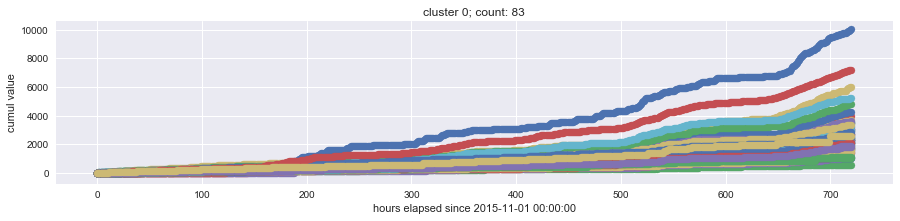

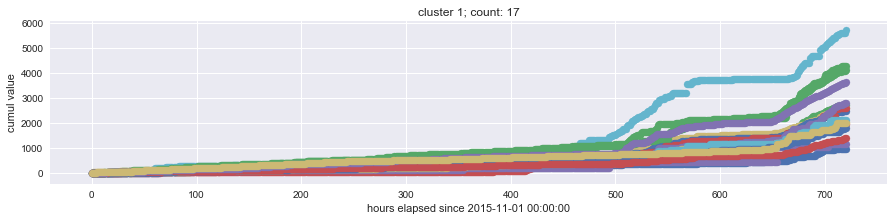

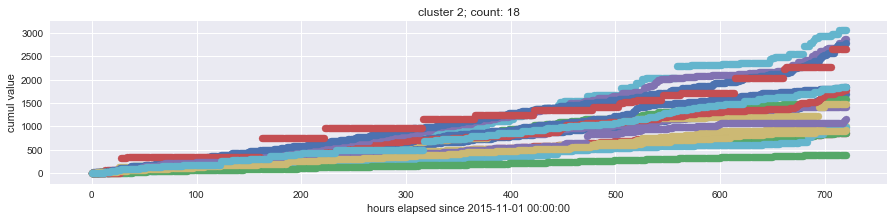

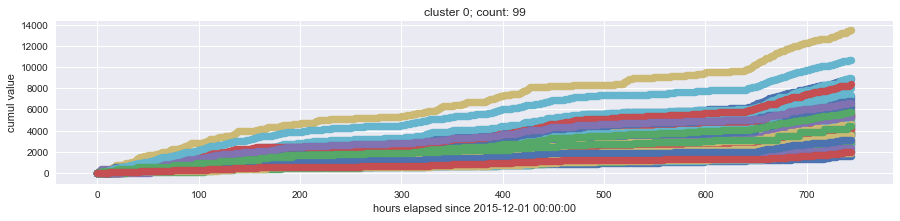

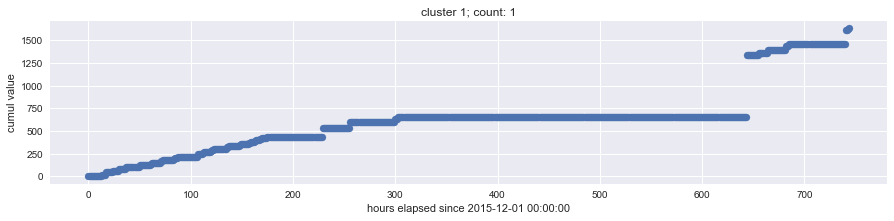

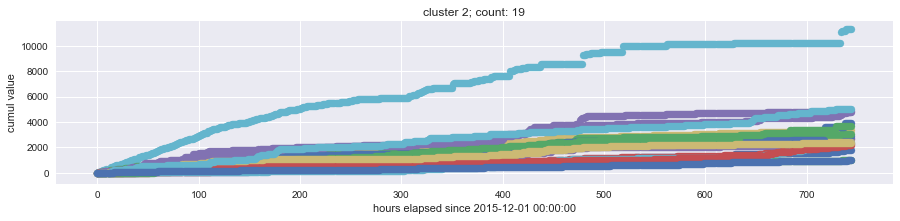

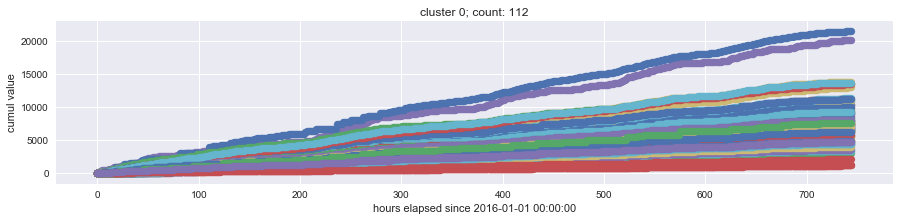

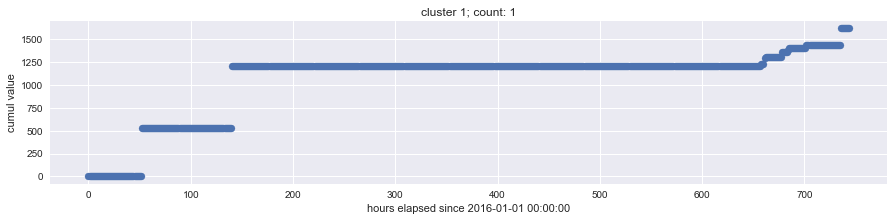

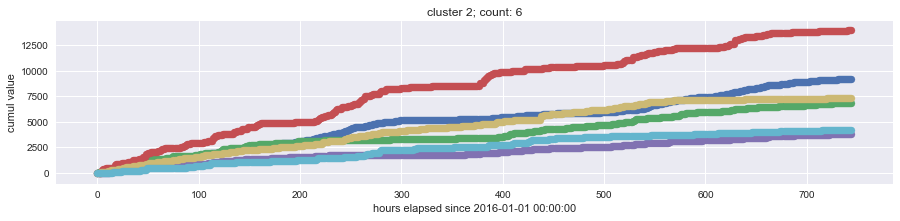

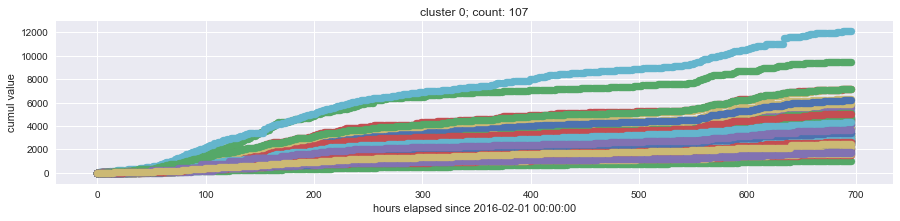

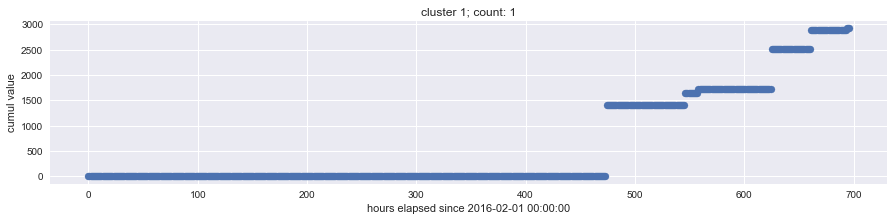

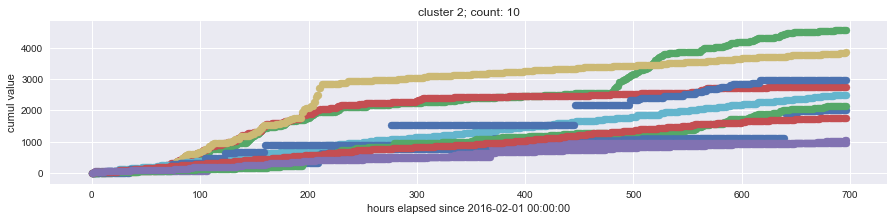

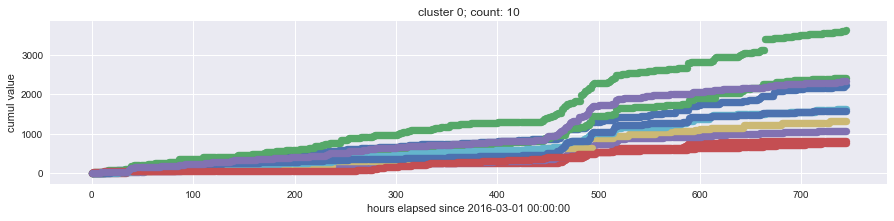

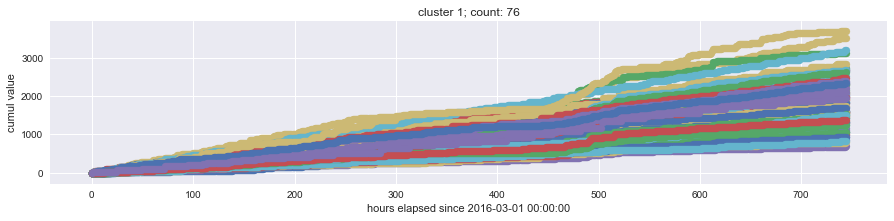

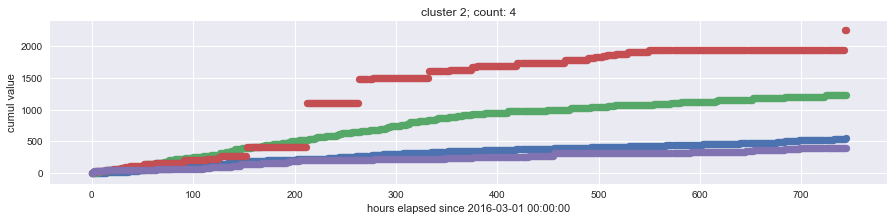

In [6]:
months = ['nov', 'dec', 'jan', 'feb', 'mar']
n_clusters = 3
for month in months:
    get_monthly_result(month, n_clusters)

### Add cluster label to data

In [7]:
# cluster labels for month=nov and n_clusters=3
labels = [2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1,\
          1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1,\
          1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1,\
          1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,\
          1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2]

df_new = pd.DataFrame()
for i in range(len(new_id_list)):
    df_i = new_groups.get_group(new_id_list[i])
    df_i['cluster_label'] = labels[i]
    df_new = df_new.append(df_i, ignore_index=True)
df_new.head()

D:\Anaconda3\envs\ipykernel_py3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,index,marginal_change,meterid,TempAvgF,HumidityAvgPercent,WindAvgMPH,norm_cumul_value,time_integer,label,cluster_label
0,2015-11-01 00:00:00,0.0,35,67.0,75.0,3.0,0.0,0,0,2
1,2015-11-01 01:00:00,12.0,35,67.0,75.0,3.0,12.0,1,0,2
2,2015-11-01 02:00:00,0.0,35,67.0,75.0,3.0,12.0,2,0,2
3,2015-11-01 03:00:00,2.0,35,67.0,75.0,3.0,14.0,3,0,2
4,2015-11-01 04:00:00,0.0,35,67.0,75.0,3.0,14.0,4,0,2


In [8]:
# split all data into three datasets (train, val, test) by time period.

def split_agg_data(train_size=0.8, valid_size=0.1):
    # df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
    num_samples_per_meterid = len(df_new) / len(new_id_list)  # this must be a whole number
    
    test_end = train_size * num_samples_per_meterid
    val_end = (train_size+valid_size) * num_samples_per_meterid
    
    train_mask = (df_new['time_integer'] >= 0) & (df_new['time_integer'] < test_end)
    val_mask = (df_new['time_integer'] >= test_end) & (df_new['time_integer'] < val_end)
    test_mask = (df_new['time_integer'] >= val_end) & (df_new['time_integer'] < num_samples_per_meterid)
        
    df_train = df_new.loc[train_mask]
    df_val = df_new.loc[val_mask]
    df_test = df_new.loc[test_mask]

    return df_train, df_val, df_test

In [9]:
df_train, df_val, df_test = split_agg_data(train_size=0.8, valid_size=0.1)

In [10]:
# x_column_names = ['time_integer', 'label', 'cluster_label',\
#                   'TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']

x_column_names = ['meterid', 'label', 'cluster_label',\
                'TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']

x_train = df_train[x_column_names].to_numpy()
x_valid = df_val[x_column_names].to_numpy()
x_test = df_test[x_column_names].to_numpy()

y_train = df_train['norm_cumul_value'].to_numpy()
y_valid = df_val['norm_cumul_value'].to_numpy()
y_test = df_test['norm_cumul_value'].to_numpy()

### Get data for all months

In [11]:
df_normalized = pd.read_csv(f'data/normalized_all.csv')
df_normalized = df_normalized.drop(columns=['Unnamed: 0'])
df_normalized.head()
# get groups and keys on dataset.

new_groups = df_normalized.groupby('meterid')
new_keys = new_groups.groups.keys()  # keys: an iterable of dataids or meter ids

new_id_list = list(new_keys)
display('number of valid meterids:', len(new_id_list))
df_i = new_groups.get_group(35)
df_i.tail()

'number of valid meterids:'

89

,index,marginal_change,meterid,TempAvgF,HumidityAvgPercent,WindAvgMPH,norm_cumul_value,time_integer,label
3644,2016-03-31 20:00:00,2.0,35,76.0,59.0,5.0,10226.0,3644,0
3645,2016-03-31 21:00:00,0.0,35,76.0,59.0,5.0,10226.0,3645,0
3646,2016-03-31 22:00:00,0.0,35,76.0,59.0,5.0,10226.0,3646,0
3647,2016-03-31 23:00:00,0.0,35,76.0,59.0,5.0,10226.0,3647,0
3648,2016-04-01 00:00:00,10.0,35,76.0,59.0,5.0,10236.0,3648,0


In [12]:
df_all_dayresampled = pd.DataFrame()
features = ['time_integer', 'meterid', 'TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']
for meterid in new_id_list:
    df_i = new_groups.get_group(meterid)
    df_i = df_i.set_index(pd.to_datetime(df_i['index']))
    df_i = df_i.drop(columns=['index'])

    ser_mc = df_i['marginal_change']
    
    df_features = df_i[features]

    ser_mc_resampled = ser_mc.resample('D').sum()
    df_features_resampled = df_i[features].resample('D').first().ffill()

    df_i_dayresampled = df_features_resampled.join(ser_mc_resampled)
    
    df_all_dayresampled = df_all_dayresampled.append(df_i_dayresampled, ignore_index=True)

In [13]:
df_all_dayresampled.tail()

,time_integer,meterid,TempAvgF,HumidityAvgPercent,WindAvgMPH,marginal_change
13612,3552,9766,62.0,51.0,4.0,2.0
13613,3576,9766,64.0,76.0,6.0,98.0
13614,3600,9766,73.0,88.0,7.0,12.0
13615,3624,9766,76.0,59.0,5.0,74.0
13616,3648,9766,76.0,59.0,5.0,0.0


In [14]:
df_35 = df_all_dayresampled.loc[df_all_dayresampled['meterid'] == new_id_list[5]]

In [15]:
df_35.tail()

,time_integer,meterid,TempAvgF,HumidityAvgPercent,WindAvgMPH,marginal_change
913,3552,483,62.0,51.0,4.0,32.0
914,3576,483,64.0,76.0,6.0,36.0
915,3600,483,73.0,88.0,7.0,52.0
916,3624,483,76.0,59.0,5.0,22.0
917,3648,483,76.0,59.0,5.0,14.0


In [16]:
df_35

,time_integer,meterid,TempAvgF,HumidityAvgPercent,WindAvgMPH,marginal_change
765,0,483,67.0,75.0,3.0,0.0
766,24,483,68.0,75.0,3.0,16.0
767,48,483,69.0,74.0,3.0,18.0
768,72,483,70.0,82.0,5.0,34.0
769,96,483,79.0,83.0,6.0,20.0
...,...,...,...,...,...,...
913,3552,483,62.0,51.0,4.0,32.0
914,3576,483,64.0,76.0,6.0,36.0
915,3600,483,73.0,88.0,7.0,52.0
916,3624,483,76.0,59.0,5.0,22.0


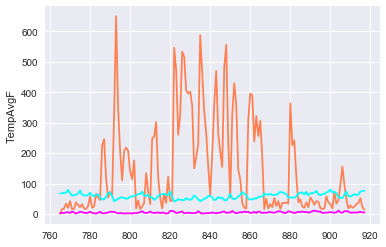

In [324]:
ax = sns.lineplot(x = df_35.index, y="marginal_change", color = "coral",data=df_35)
ax = sns.lineplot(x = df_35.index, y="WindAvgMPH", color = "magenta",data=df_35)
# ax = sns.lineplot(x = df_35.index, y="HumidityAvgPercent", color = "teal",data=df_35)
ax = sns.lineplot(x = df_35.index, y="TempAvgF", color = "cyan",data=df_35)
# ax = sns.lineplot(x = df_35.index, y="WindAvgMPH", color = "blue",data=df_35)
# plt.plot(np.arange(-44, 44), np.arange(-44, 44), color = "orange")
# plt.title('GP Test Set Analysis: 2009 to 2014')

In [325]:
df_35_train = df_35.iloc[0:100]

In [326]:
df_35_valid = df_35.iloc[100:120]

In [327]:
df_35_test = df_35.iloc[120:len(df_35)]

In [328]:
df_35_train.head()

,time_integer,meterid,TempAvgF,HumidityAvgPercent,WindAvgMPH,marginal_change
765,0,483,67.0,75.0,3.0,0.0
766,24,483,68.0,75.0,3.0,16.0
767,48,483,69.0,74.0,3.0,18.0
768,72,483,70.0,82.0,5.0,34.0
769,96,483,79.0,83.0,6.0,20.0


In [329]:
x_train = df_35_train[['TempAvgF']].to_numpy()
y_train = df_35_train['marginal_change'].to_numpy()
x_valid = df_35_valid[['TempAvgF']].to_numpy()
y_valid = df_35_valid['marginal_change'].to_numpy()
x_test = df_35_test[['TempAvgF']].to_numpy()
y_test = df_35_test['marginal_change'].to_numpy()

# Linear Regression

In [330]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
# run predictions and get scores

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [331]:
y_train_pred = lr_model.predict(x_train)
r2_train = lr_model.score(x_train, y_train)

y_valid_pred = lr_model.predict(x_valid)
r2_valid = lr_model.score(x_valid, y_valid)

y_test_pred = lr_model.predict(x_test)
r2_test = lr_model.score(x_test, y_test)

In [332]:
print(r2_train)
print(r2_valid)
print(r2_test)

0.7168521199048805
0.5194161765316292
-12.942432472265471


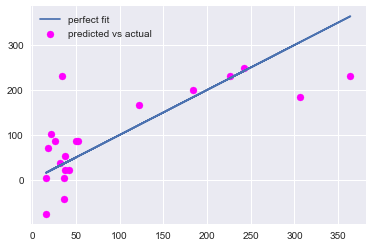

In [333]:
import seaborn as sns
# test1_sns = sns.load_dataset("test1")
plt.scatter(y_valid, y_valid_pred, color='magenta', label='predicted vs actual')
plt.plot(y_valid, y_valid, label='perfect fit')
plt.legend()

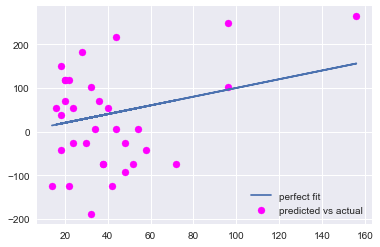

In [334]:
import seaborn as sns
# test1_sns = sns.load_dataset("test1")
plt.scatter(y_test, y_test_pred, color='magenta', label='predicted vs actual')
plt.plot(y_test, y_test, label='perfect fit')
plt.legend()

In [335]:
# # plot timeseries of predicted and actual values.

# plt.title(f'r2_train: {r2_train:.3f}; r2_val: {r2_valid:.3f}; r2_test: {r2_test:.3f}')
# plt.xlabel(f'hours elapsed since {df_i.index[0]}') 
# plt.plot(df_train['time_integer'], y_train, label='actual train')
# plt.plot(df_train['time_integer'], y_train_pred, label='prediction on train')

# plt.plot(df_val['time_integer'], y_valid, label='actual val')
# plt.plot(df_val['time_integer'], y_valid_pred, label='prediction on val')

# plt.plot(df_test['time_integer'], y_test, label='actual test')
# plt.plot(df_test['time_integer'], y_test_pred, label='prediction on test')

# plt.legend()

# SVR

In [336]:
from sklearn.svm import SVR
model = SVR(C = 1159, gamma = 'scale', kernel = 'rbf')
model.fit(x_train, y_train)

SVR(C=1159, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [337]:
y_train_pred = model.predict(x_train)
r2_train = model.score(x_train, y_train)

y_valid_pred = model.predict(x_valid)
r2_valid = model.score(x_valid, y_valid)

y_test_pred = model.predict(x_test)
r2_test = model.score(x_test, y_test)

In [338]:
print('r2 train = ' + str(r2_train))
print('r2 valid = ' + str(r2_valid))
print('r2 test = ' + str(r2_test))

r2 train = 0.8239544828970427
r2 valid = 0.5407472911921727
r2 test = -1.3615476426356885


In [339]:
# # plot timeseries of predicted and actual values.

# plt.title(f'r2_train: {r2_train:.3f}; r2_val: {r2_valid:.3f}; r2_test: {r2_test:.3f}')
# plt.xlabel(f'hours elapsed since {df_i.index[0]}') 
# plt.plot(df_train['time_integer'], y_train, label='actual train')
# plt.plot(df_train['time_integer'], y_train_pred, label='prediction on train')

# plt.plot(df_val['time_integer'], y_valid, label='actual val')
# plt.plot(df_val['time_integer'], y_valid_pred, label='prediction on val')

# plt.plot(df_test['time_integer'], y_test, label='actual test')
# plt.plot(df_test['time_integer'], y_test_pred, label='prediction on test')

# plt.legend()

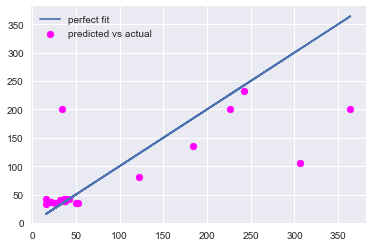

In [340]:
plt.scatter(y_valid, y_valid_pred, color='magenta', label='predicted vs actual')
plt.plot(y_valid, y_valid, label='perfect fit')
plt.legend()

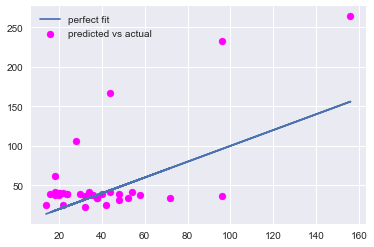

In [341]:
plt.scatter(y_test, y_test_pred, color='magenta', label='predicted vs actual')
plt.plot(y_test, y_test, label='perfect fit')
plt.legend()

### Walk-forward Validation

In [342]:
day_groups = df_all_dayresampled.groupby('meterid')

def split_data(x_column_names=[], origin_date=None, end_date=None, meterid=35, train_size=0.8, valid_size=0.1):
    
    df_i = day_groups.get_group(meterid)

    # zoom in on specified time period.
    if origin_date is not None and end_date is not None:
        df_i = zoom(df_i, origin_date, end_date)
     
    X = df_i[x_column_names].to_numpy()
    
    #y = df_i['norm_cumul_value'].to_numpy().astype('int')
    y = df_i['marginal_change'].to_numpy().astype('int')

    # split dataset
    valid_start, test_start = int(len(df_i)*train_size), int(len(df_i)*(train_size+valid_size))
    x_train, x_valid, x_test = X[:valid_start,:], X[valid_start:test_start,:], X[test_start:,:]
    y_train, y_valid, y_test = y[:valid_start], y[valid_start:test_start], y[test_start:]
    return X, x_train, x_valid, x_test, y, y_train, y_valid, y_test

# rolling window walk forward validation:
def rolling_walk_forward_val_plusn(model, X, y, n, window_size=250):
    # predict t+1+n into the future
    #window_size = 250
    predictions = []
    
    for i in range(0, len(X) - window_size - n):
        train_x, test_x = X[i:i+window_size], X[i+window_size:i+window_size+1+n]
        train_y, test_y = y[i:i+window_size], y[i+window_size:i+window_size+1+n]
        # train model, predict next timestep, record prediction
        model.fit(train_x, train_y)
        pred = model.predict(test_x)[0]
        predictions.append(pred)

    predictions_arr = np.asarray(predictions)

    # overall evaluation of model performance:
    # 1. correlation analysis of predicted vs actual?
    # 2. R^2 and RMSE
    # 3. plot residual and prediction error and observe.
    mse = mean_squared_error(y_true=y[window_size+n:], y_pred=predictions_arr)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_true=y[window_size+n:], y_pred=predictions_arr)
    
    # naive baseline prediction based on t-1
    #y_naive_base = np.roll(y[window_size:], shift=1)
    #y_naive_base[0] = y_naive_base[1]
    #r2base = r2_score(y_true=y[window_size:], y_pred=y_naive_base)
    
    time = np.arange(start=0, stop=len(X), step=1).reshape(-1, 1)
    
    plt.cla()
    plt.plot(time[window_size+n:], y[window_size+n:], label='actual')
    plt.plot(time[window_size+n:], predictions_arr, label='predicted')
    #plt.plot(X[window_size:], y_naive_base, label='baseline')

    plt.title(f'next {1+n}hour forecast for meterid {meterid}; r2:{r2:.3f} rmse:{rmse:.3f}')
    plt.xlabel(f'days elapsed since {df_normalized["index"].iloc[0]}') 
    plt.legend()
    plt.show()
    return rmse, r2, predictions_arr

In [351]:
# 'time_integer', 'HumidityAvgPercent', 'WindAvgMPH', 'TempAvgF'
features = ['HumidityAvgPercent', 'WindAvgMPH', 'TempAvgF']
meterid = new_id_list[5]
X, x_train, x_valid, x_test, y, y_train, y_valid, y_test = split_data(x_column_names=features, meterid=meterid)

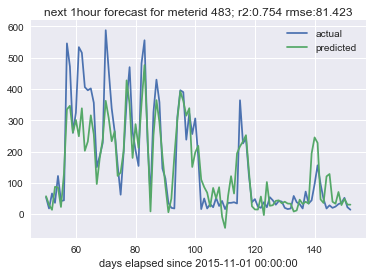

In [352]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import math
model = SVR(C = 1159, gamma = 'scale', kernel = 'rbf')
n = 0
rmse, r2, predictions_arr = rolling_walk_forward_val_plusn(model, X, y, n, window_size=50)

### Normal Validation

In [353]:
X, x_train, x_valid, x_test, y, y_train, y_valid, y_test = split_data(x_column_names=features, meterid=meterid)

In [354]:
model = SVR(C = 1159, gamma = 'scale', kernel = 'rbf')
model.fit(x_train, y_train)

SVR(C=1159, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [355]:
y_train_pred = model.predict(x_train)
r2_train = model.score(x_train, y_train)

y_valid_pred = model.predict(x_valid)
r2_valid = model.score(x_valid, y_valid)

y_test_pred = model.predict(x_test)
r2_test = model.score(x_test, y_test)

In [356]:
print('r2 train = ' + str(r2_train))
print('r2 valid = ' + str(r2_valid))
print('r2 test = ' + str(r2_test))

r2 train = 0.822708614768068
r2 valid = -8.019976547179782
r2 test = -3.578597536388616


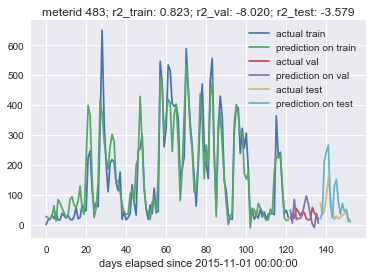

In [357]:
# plot trendline and actual line.
time = np.arange(start=0, stop=len(X), step=1).reshape(-1, 1)
plt.cla()
plt.title(f'meterid {meterid}; r2_train: {r2_train:.3f}; r2_val: {r2_valid:.3f}; r2_test: {r2_test:.3f}')
plt.xlabel(f'days elapsed since {df_i.index[0]}') 
plt.plot(time[:len(x_train)], y_train, label='actual train')
plt.plot(time[:len(x_train)], y_train_pred, label='prediction on train')

plt.plot(time[len(x_train):len(x_train)+len(x_valid)], y_valid, label='actual val')
plt.plot(time[len(x_train):len(x_train)+len(x_valid)], y_valid_pred, label='prediction on val')

plt.plot(time[len(x_train)+len(x_valid):], y_test, label='actual test')
plt.plot(time[len(x_train)+len(x_valid):], y_test_pred, label='prediction on test')

plt.legend()
plt.show()

### MARGINAL CHANGE IS PREDICTED WELL BY DAILY AVERAGE TEMPERATURE!

# Gaussian Processes

In [ ]:
import gpflow

In [ ]:
df

In [ ]:
dims = len(x_column_names)
length = len(x_train)

# k = gpflow.kernels.RBF(120)
# k = gpflow.kernels.RBF(input_dim=120, variance=1., lengthscales=0.5)
# k = gpflow.kernels.RBF(input_dim=10, variance=1., lengthscales=0.2)
k = gpflow.kernels.Matern32(input_dim=dims, variance=1.,lengthscales=0.5)
# k = k + k2

# k = gpflow.kernels.White(input_dim=120)
# k = gpflow.kernels.Linear(input_dim=120)

# meanf = gpflow.mean_functions.Constant(c=np.zeros((1,1)))
meanf = gpflow.mean_functions.Linear(np.zeros((dims,length)),np.zeros(length))
# meanf = gpflow.mean_functions.Constant(1)
m = gpflow.models.GPR(x_train, y_train.reshape(length,1), k, meanf)
m.likelihood.variance = 0.01

In [ ]:
m.as_pandas_table()

In [ ]:
gpflow.train.ScipyOptimizer().minimize(m)
# plot(m)
m.as_pandas_table()

In [ ]:
results = m.predict_y(x_valid)
results

In [ ]:
np.array(results).shape

In [ ]:
y_valid_length = len(y_valid)
y_valid_length

In [ ]:
y_pred = np.zeros(y_valid_length)
for i in range(y_valid_length):
    y_pred[i] = np.mean(results[0][i])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_valid, y_pred))
rmse

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_valid, test1)

# GBMs

In [ ]:
import lightgbm as lgb
from sklearn.metrics import r2_score

In [ ]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_valid = lgb.Dataset(x_valid, label = y_valid)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

In [ ]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [ ]:
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=60,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

In [ ]:
print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)
# eval

print('The r2 of prediction is:', r2_score(y_valid, y_pred))

In [ ]:
#run predictions and get scores
y_train_pred = gbm.predict(x_train, num_iteration=gbm.best_iteration)
r2_train = r2_score(y_train_pred, y_train)

y_valid_pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)
r2_valid = r2_score(y_valid_pred, y_valid)

y_test_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)
r2_test = r2_score(y_test_pred, y_valid)

In [ ]:
print('r2 train = ' + str(r2_train))
print('r2 valid = ' + str(r2_valid))
print('r2 test = ' + str(r2_test))

In [ ]:
# plot timeseries of predicted and actual values.

plt.title(f'r2_train: {r2_train:.3f}; r2_val: {r2_valid:.3f}; r2_test: {r2_test:.3f}')
plt.xlabel(f'hours elapsed since {df_i.index[0]}') 
plt.plot(df_train['time_integer'], y_train, label='actual train')
plt.plot(df_train['time_integer'], y_train_pred, label='prediction on train')

plt.plot(df_val['time_integer'], y_valid, label='actual val')
plt.plot(df_val['time_integer'], y_valid_pred, label='prediction on val')

plt.plot(df_test['time_integer'], y_test, label='actual test')
plt.plot(df_test['time_integer'], y_test_pred, label='prediction on test')

plt.legend()

# LSTM #

In [158]:
SEQ_LEN = 7
FUTURE_PERIOD_PREDICT = 1

df = df_all_dayresampled.loc[df_all_dayresampled['meterid'] == new_id_list[0]]
df = df.drop(['time_integer', 'meterid', 'meterid'], axis=1)
# df['future_marginal_change'] = df['marginal_change'].shift(-FUTURE_PERIOD_PREDICT)
# df.dropna(inplace=True)
display(df.head(3))

# split to train and test sets
readings = sorted(df.index.values)
last_20pct = readings[-int(0.2*len(readings))]
test_df = df[(df.index >= last_20pct)]
train_df = df[(df.index < last_20pct)]

display(train_df.head(3))
display(train_df.shape)
display(test_df.head(3))
display(test_df.shape)

,TempAvgF,HumidityAvgPercent,WindAvgMPH,marginal_change
0,67.0,75.0,3.0,62.0
1,68.0,75.0,3.0,16.0
2,69.0,74.0,3.0,74.0


,TempAvgF,HumidityAvgPercent,WindAvgMPH,marginal_change
0,67.0,75.0,3.0,62.0
1,68.0,75.0,3.0,16.0
2,69.0,74.0,3.0,74.0


(123, 4)

,TempAvgF,HumidityAvgPercent,WindAvgMPH,marginal_change
123,73.0,53.0,7.0,60.0
124,61.0,48.0,4.0,42.0
125,68.0,66.0,6.0,64.0


(30, 4)

In [159]:
# normalize data to percentage and scale it while adding target data

from sklearn import preprocessing
from collections import deque
import random

pd.options.mode.chained_assignment = None

def preprocess_df(df, SEQ_LEN, FUTURE_PERIOD_PREDICT):
    for col in df.columns:
        if col != "marginal_change":
            df[col] = df[col].pct_change()
            df[col] = preprocessing.scale(df[col].values, with_mean=False)
        elif col == "marginal_change":
            df[col] = preprocessing.scale(df[col].values, with_mean=False)
            

    df['future_marginal_change'] = df['marginal_change'].shift(-FUTURE_PERIOD_PREDICT)
    df.dropna(inplace=True)
    
    sequential_data = []
    prev_days = deque(maxlen=SEQ_LEN)
    
    for i in df.values:
        prev_days.append([n for n in i[:-1]])
        if len(prev_days) == SEQ_LEN:
            sequential_data.append([np.array(prev_days), i[-1]])
    
    random.shuffle(sequential_data)
    
    x = []
    y = []
    
    for seq, target in sequential_data:
        x.append(seq)
        y.append(target)
    
    return np.array(x), np.array(y)
    
x_train, y_train = preprocess_df(train_df, SEQ_LEN, FUTURE_PERIOD_PREDICT)
x_test, y_test = preprocess_df(test_df, SEQ_LEN, FUTURE_PERIOD_PREDICT)
train_df

,TempAvgF,HumidityAvgPercent,WindAvgMPH,marginal_change,future_marginal_change
1,0.135808,0.000000,0.000000,0.391771,1.811940
2,0.133811,-0.058624,0.000000,1.811940,1.126341
3,0.131872,0.475333,0.841419,1.126341,0.734570
4,1.169889,0.053620,0.252426,0.734570,1.371198
5,-1.266968,-1.112451,-0.631064,1.371198,1.126341
...,...,...,...,...,...
117,-0.168503,-0.912550,-0.504851,1.616055,1.224284
118,0.858409,2.093728,0.841419,1.224284,1.273255
119,1.411935,0.709166,0.504851,1.273255,1.322227
120,0.407424,0.000000,-0.180304,1.322227,1.469141


In [160]:
display(x_train.shape)
display(len(y_train))
display(x_test.shape)
display(len(y_test))

(115, 7, 4)

115

(22, 7, 4)

22

In [166]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization

EPOCHS = 100
BATCH_SIZE = 64

model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

model.add(LSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

model.add(LSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(BatchNormalization())

# model.add(Dense(32, activation="tanh"))
# model.add(Dropout(0.2))

model.add(Dense(1, activation="softmax"))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [167]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 7, 128)            68096     
_________________________________________________________________
lstm_46 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
lstm_47 (LSTM)               (None, 7, 128)            131584    
_________________________________________________________________
dense_22 (Dense)             (None, 7, 1)              129       
Total params: 331,393
Trainable params: 331,393
Non-trainable params: 0
_________________________________________________________________


In [168]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test))

Train on 115 samples, validate on 22 samples
Epoch 1/100
115/115 [==============================] - 6s 52ms/sample - loss: 1.9459 - accuracy: 0.0000e+00 - val_loss: 1.9459 - val_accuracy: 0.0000e+00
Epoch 2/100
115/115 [==============================] - 0s 711us/sample - loss: 1.9459 - accuracy: 0.0000e+00 - val_loss: 1.9459 - val_accuracy: 0.0000e+00
Epoch 3/100
115/115 [==============================] - 0s 815us/sample - loss: 1.9459 - accuracy: 0.0000e+00 - val_loss: 1.9459 - val_accuracy: 0.0000e+00
Epoch 4/100
115/115 [==============================] - 0s 754us/sample - loss: 1.9459 - accuracy: 0.0000e+00 - val_loss: 1.9459 - val_accuracy: 0.0000e+00
Epoch 5/100
115/115 [==============================] - 0s 807us/sample - loss: 1.9459 - accuracy: 0.0000e+00 - val_loss: 1.9459 - val_accuracy: 0.0000e+00
Epoch 6/100
115/115 [==============================] - 0s 763us/sample - loss: 1.9459 - accuracy: 0.0000e+00 - val_loss: 1.9459 - val_accuracy: 0.0000e+00
Epoch 7/100
115/115 [=====

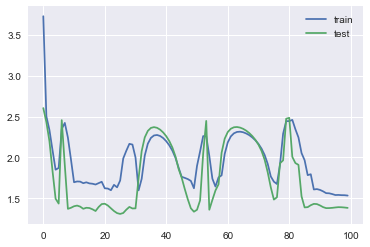

In [151]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# LSTM 2

In [17]:
df = df_all_dayresampled.loc[df_all_dayresampled['meterid'] == new_id_list[0]]
df = df.drop(['time_integer', 'meterid', 'meterid'], axis=1)
display(df.head(3))
df.shape

,TempAvgF,HumidityAvgPercent,WindAvgMPH,marginal_change
0,67.0,75.0,3.0,62.0
1,68.0,75.0,3.0,16.0
2,69.0,74.0,3.0,74.0


(153, 4)

In [18]:
TRAIN_SPLIT = 150

dataset = df.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std
dataset.shape

(153, 4)

In [19]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [20]:
past_history = 7
future_target = 1
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)

x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [21]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (7, 4)


In [25]:
import tensorflow as tf

BATCH_SIZE = 1
BUFFER_SIZE = 1

# train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
# train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

# val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
# val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=(x_train_single.shape[1], x_train_single.shape[2])))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

# train_data_single

In [26]:
# for x, y in val_data_single.take(1):
#   print(single_step_model.predict(x).shape)

In [27]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

single_step_history = single_step_model.fit(x_train_single, y_train_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

NameError: name 'val_data_single' is not defined